In [234]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date,time,datetime
from scipy.stats import norm
import matplotlib.pyplot as plt
data1 = pd.read_csv('/Users/xwx/Desktop/徐丸絮/研究生学习/发表论文/data/p00290_travelTimeForPredict.txt')
#data3 = pd.read_csv('/Users/xwx/Desktop/xwx/研究生学习/paper/data/usefuldata0418.txt')
#data2 = pd.read_csv('/Users/xwx/Desktop/xwx/研究生学习/paper/data/w00290_travelTimeForPredict.txt')

In [235]:
data1.head()

,Number,trip,bus_id,line,date,type,direction,stop,time_dept,time_arr,intervalNo,HRT-s,HRT-e,traveltime(s)
0,1,683,26,290,2017/1/30,平日,1,1,10:18:31,10:55:11,3,8:30:00,17:15:00,2200
1,2,4607,27,290,2017/1/2,平日,1,1,6:41:09,7:20:10,1,0:00:00,7:15:00,2341
2,3,3346,31,290,2017/1/2,平日,1,1,6:48:27,7:34:29,1,0:00:00,7:15:00,2762
3,4,1696,6,290,2017/1/2,平日,1,1,6:58:12,7:41:01,1,0:00:00,7:15:00,2569
4,5,5421,4,290,2017/1/2,平日,1,1,7:04:51,7:50:23,1,0:00:00,7:15:00,2732


In [236]:
#重命名列
a=data1.columns[8]
b=data1.columns[9]
c=data1.columns[13]
data1=data1.rename(columns={a:"time_dept",b:"time_arr",c:'label'})
data1.head()

,Number,trip,bus_id,line,date,type,direction,stop,time_dept,time_arr,intervalNo,HRT-s,HRT-e,label
0,1,683,26,290,2017/1/30,平日,1,1,10:18:31,10:55:11,3,8:30:00,17:15:00,2200
1,2,4607,27,290,2017/1/2,平日,1,1,6:41:09,7:20:10,1,0:00:00,7:15:00,2341
2,3,3346,31,290,2017/1/2,平日,1,1,6:48:27,7:34:29,1,0:00:00,7:15:00,2762
3,4,1696,6,290,2017/1/2,平日,1,1,6:58:12,7:41:01,1,0:00:00,7:15:00,2569
4,5,5421,4,290,2017/1/2,平日,1,1,7:04:51,7:50:23,1,0:00:00,7:15:00,2732


In [237]:
#去掉不需要的列
col=["Number","trip","bus_id","line","stop",data1.columns[10],data1.columns[11],data1.columns[12]]
data1.drop(col,axis=1,inplace=True)


In [238]:
data1.head()

,date,type,direction,time_dept,time_arr,label
0,2017/1/30,平日,1,10:18:31,10:55:11,2200
1,2017/1/2,平日,1,6:41:09,7:20:10,2341
2,2017/1/2,平日,1,6:48:27,7:34:29,2762
3,2017/1/2,平日,1,6:58:12,7:41:01,2569
4,2017/1/2,平日,1,7:04:51,7:50:23,2732


In [239]:
#将date与time_dept转换为时间格式并作为索引值
from datetime import datetime 
#先把hour拆出来
def func(x): 
    y=x.split(':')
    return y[0]
data1['hour']=data1.time_dept.astype('str').apply(func)
data1["time"]=data1.date+' '+data1.hour
#设为索引
data1['index']= data1.time.apply(lambda x:datetime.strptime(x, '%Y/%m/%d %H'))
data1.set_index(["index"],inplace=True)
data.sort_values(by='index',ascending=True,inplace=True)
data1.head()

,date,type,direction,time_dept,time_arr,label,hour,time
index,,,,,,,,
2017-01-30 10:00:00,2017/1/30,平日,1,10:18:31,10:55:11,2200,10,2017/1/30 10
2017-01-02 06:00:00,2017/1/2,平日,1,6:41:09,7:20:10,2341,6,2017/1/2 6
2017-01-02 06:00:00,2017/1/2,平日,1,6:48:27,7:34:29,2762,6,2017/1/2 6
2017-01-02 06:00:00,2017/1/2,平日,1,6:58:12,7:41:01,2569,6,2017/1/2 6
2017-01-02 07:00:00,2017/1/2,平日,1,7:04:51,7:50:23,2732,7,2017/1/2 7


In [240]:
type(data1.label[0])

numpy.int64

In [196]:
#将处理好的数据存入
data1.to_csv("/Users/xwx/Desktop/徐丸絮/研究生学习/发表论文/data/usefuldata.csv")


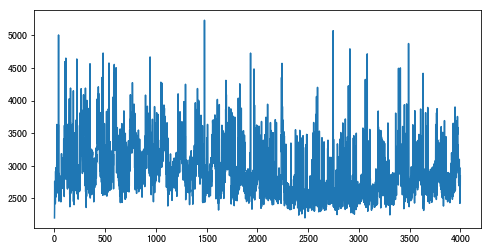

In [198]:
#画图 研究label的趋势

#创建一个图像
fig=plt.figure()
fig.set(alpha=0.2)
plt.plot(data1.label.values[0:4000])
plt.rcParams['figure.figsize'] = (8.0, 4.6)

In [244]:
#构造数据
from sklearn import preprocessing
#构造时间序列
timesteps=1
features=1

'''
col=list()
col.append(data1.label.shift(1))
col.append(data1.label)
agg = pd.concat(col, axis=1)
agg.columns=['input_seq','output_seq']
agg.dropna(inplace=True)
'''
# convert series to supervised learning

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1] #变量的个数
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1): #n_in代表输入往下退的次数，相当于把后n个挤掉了
        cols.append(df.shift(i))#将数据向下移动i格但是索引值不变
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]#存放变量名
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):#把后n+1个作为输出
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    #然后将输入输出合并 Var1（t-1）那一列代表的就是前t-1时刻var1的时间序列之后作为输入
    #var1(t)那一列代表后t时刻（t，t+1...t+n）的var1的时间序列，是之后的输出序列
    agg = pd.concat(cols, axis=1)
    agg.columns = names#为序列命名
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)#是否过滤空数据
    return agg
values=data1.label.values
values=values.reshape(-1,1)
#归一化
min_max_scaler = preprocessing.MinMaxScaler()
values_min_max = min_max_scaler.fit_transform(values)

agg=series_to_supervised(values_min_max,timesteps,features)#构造成前三个小时作为输入，下一个时刻作为输出
agg.head()

/Users/xwx/anaconda3/envs/WZTensorflow_Py37/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,var1(t-1),var1(t)
1,0.035676,0.073784
2,0.073784,0.187568
3,0.187568,0.135405
4,0.135405,0.179459
5,0.179459,0.148919


In [245]:
values.shape

(12166, 1)

In [257]:
values=agg.values

#分割训练集与测试集（9000+3000）
X_train=values[0:9000,0:timesteps*features]
y_train=values[0:9000,-1]

X_test=values[9000:,0:timesteps*features]
y_test=values[9000:,-1]

#构造成LSTM需要的输入格式
X_train=X_train.reshape((9000,timesteps,features))
X_test=X_test.reshape((X_test.shape[0],timesteps,features))

print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(9000, 1, 1) (9000,) (3165, 1, 1) (3165,)


Train on 9000 samples, validate on 3165 samples
Epoch 1/30
 - 2s - loss: 0.0998 - val_loss: 0.0470
Epoch 2/30
 - 0s - loss: 0.0735 - val_loss: 0.0454
Epoch 3/30
 - 1s - loss: 0.0721 - val_loss: 0.0443
Epoch 4/30
 - 1s - loss: 0.0705 - val_loss: 0.0435
Epoch 5/30
 - 1s - loss: 0.0691 - val_loss: 0.0429
Epoch 6/30
 - 1s - loss: 0.0680 - val_loss: 0.0426
Epoch 7/30
 - 0s - loss: 0.0670 - val_loss: 0.0423
Epoch 8/30
 - 0s - loss: 0.0664 - val_loss: 0.0421
Epoch 9/30
 - 0s - loss: 0.0659 - val_loss: 0.0420
Epoch 10/30
 - 0s - loss: 0.0654 - val_loss: 0.0421
Epoch 11/30
 - 0s - loss: 0.0652 - val_loss: 0.0421
Epoch 12/30
 - 0s - loss: 0.0651 - val_loss: 0.0422
Epoch 13/30
 - 0s - loss: 0.0650 - val_loss: 0.0420
Epoch 14/30
 - 0s - loss: 0.0648 - val_loss: 0.0421
Epoch 15/30
 - 0s - loss: 0.0648 - val_loss: 0.0421
Epoch 16/30
 - 1s - loss: 0.0648 - val_loss: 0.0421
Epoch 17/30
 - 1s - loss: 0.0647 - val_loss: 0.0421
Epoch 18/30
 - 1s - loss: 0.0647 - val_loss: 0.0421
Epoch 19/30
 - 0s - loss:

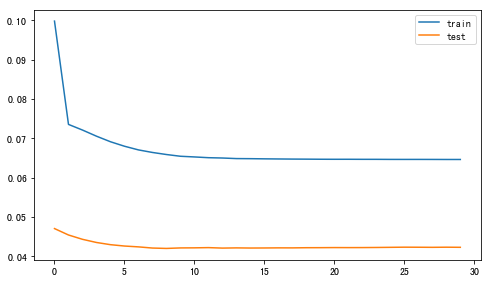

In [258]:
#搭建模型
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"#因为运行的时候好像有什么包冲突所以加一句这个，和模型本身无关

from keras. models import Sequential
from keras.layers.core import Dense, Dropout
from keras.layers.recurrent import LSTM

model = Sequential()
model.add(LSTM(10, input_shape=(timesteps, features)))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(X_train, y_train, epochs=30, batch_size=72, validation_data=(X_test, y_test), verbose=2, shuffle=False)

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [248]:
#模型可视化
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 10)                480       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [251]:
#模型评估
#模型评估
from math import sqrt
from sklearn.metrics import mean_absolute_error,mean_squared_error
# make a prediction
X_test=X_test.reshape((X_test.shape[0],timesteps,features))
yhat = model.predict(X_test)#预测值也是[0,1]之间的，因此要转换回原来的值
X_test = X_test.reshape((X_test.shape[0],timesteps*features))
 
# invert scaling for forecast
inv_yhat = np.concatenate((X_test[:,0:features-1],yhat), axis=1)#按列的方式进行组合
inv_yhat = min_max_scaler.inverse_transform(inv_yhat)#从0~1反变换为真实数据
inv_yhat = inv_yhat[:,-1]
 
# invert scaling for actual
y=y_test.reshape(y_test.shape[0],1)
inv_y = np.concatenate(( X_test[:,0:features-1],y), axis=1)
inv_y = min_max_scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]
 
# calculate RMSE、MAE
h=data.label.values[9000:-1]
rmse = sqrt(mean_squared_error(h, inv_yhat))
mae=mean_absolute_error(inv_y, inv_yhat)
mape=100*np.mean(np.abs((inv_y-inv_yhat)/inv_y))
print('Test MaE: %.3f' % mae)
print('Test MAPE: %.5f' % mape)

Test MaE: 155.177
Test MAPE: 5.56458


array([[0.09293463, 0.06837838, 0.11459459, 0.11513514],
       [0.23187789, 0.11459459, 0.11513514, 0.56108108],
       [0.19865128, 0.11513514, 0.56108108, 0.1127027 ],
       ...,
       [0.07603268, 0.0872973 , 0.07324324, 0.07216216],
       [0.07730374, 0.07324324, 0.07216216, 0.0872973 ],
       [0.07183141, 0.07216216, 0.0872973 , 0.05432432]])

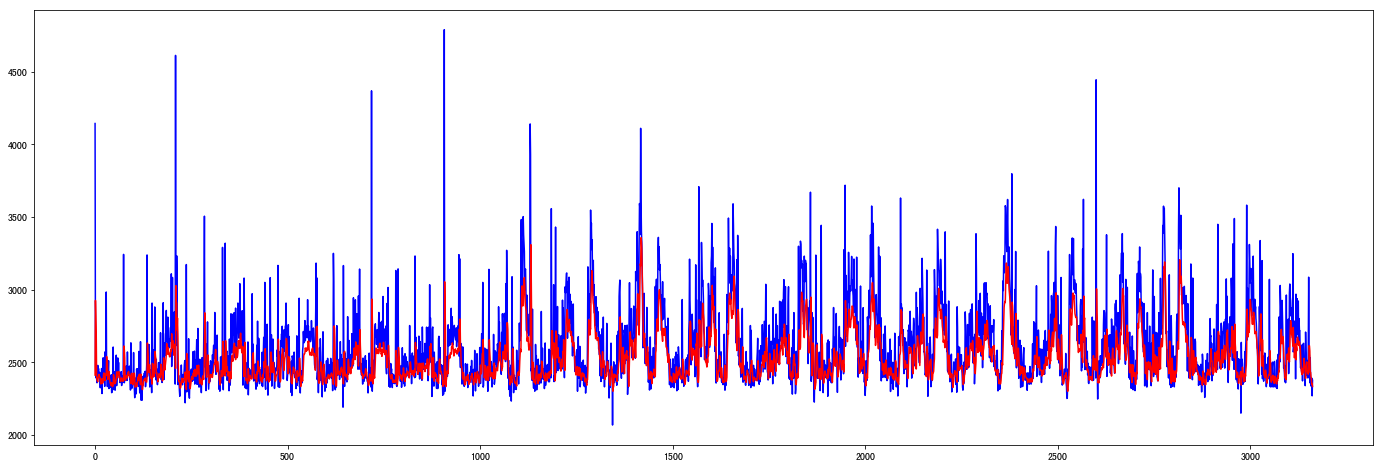

In [209]:
#画出实际和预测曲线
plt.figure(figsize=(24,8))
plt.plot(list(range(len(inv_y))), inv_y, color='b')
plt.plot(list(range(len(inv_yhat))), inv_yhat, color='r')
plt.show()
